### 코스피 정보 출력 

In [48]:
import matplotlib.pyplot as plt

import matplotlib as mpl 
# 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'

In [49]:
# API 사용
import FinanceDataReader as fdr
# fdr.DataReader('005930', '2020-01-01', '2020-12-31').plot()
# fdr.DataReader('KS11', '2020-01-01', '2020-12-31').plot()
# symbol_kospi = fdr.DataReader('KS11', '2023-01-01', '2023-12-31')
symbol_kospi = fdr.DataReader('KS11', '2023')
symbol_kospi
symbol_kospi.info()

# symbol_kospi.plot()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 483 entries, 2023-01-02 to 2024-12-19
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    483 non-null    float64
 1   High    483 non-null    float64
 2   Low     483 non-null    float64
 3   Close   483 non-null    float64
 4   Volume  483 non-null    int64  
 5   Change  483 non-null    float64
 6   UpDown  483 non-null    int64  
 7   Comp    483 non-null    float64
 8   Amount  483 non-null    int64  
 9   MarCap  483 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 41.5 KB


In [50]:
symbol_kospi.describe()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
count,483.000000,483.000000,483.000000,483.000000,4.830000e+02,483.000000,483.000000,483.000000,4.830000e+02,4.830000e+02
mean,2569.337950,2581.382878,2553.778841,2567.178406,5.139635e+08,0.000238,1.476190,0.413437,1.020935e+13,2.065593e+15
std,121.793365,120.516411,122.523488,121.594249,1.482369e+08,0.011122,0.499951,28.485788,2.716296e+12,1.173089e+14
min,2205.980000,2230.980000,2180.670000,2218.680000,2.406750e+08,-0.087700,1.000000,-234.640000,5.025541e+12,1.753771e+15
25%,2480.795000,2492.530000,2465.490000,2481.075000,4.093307e+08,-0.006100,1.000000,-15.545000,8.385362e+12,1.986032e+15
50%,2570.240000,2582.000000,2555.460000,2567.550000,4.841884e+08,0.000400,1.000000,1.100000,9.811877e+12,2.050228e+15
75%,2650.025000,2660.580000,2631.370000,2647.350000,5.926322e+08,0.006500,2.000000,17.385000,1.154978e+13,2.153335e+15
max,2888.760000,2896.430000,2879.280000,2891.350000,1.089216e+09,0.056600,2.000000,134.030000,3.634821e+13,2.363627e+15


### 꺾은 선 그래프 표시

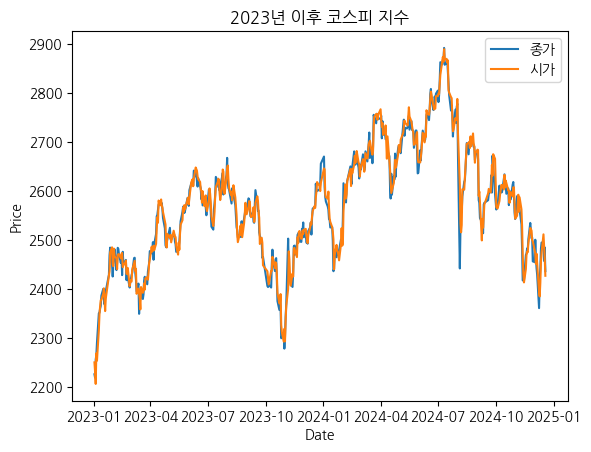

In [51]:
plt.plot(symbol_kospi['Close'], label='종가')
plt.plot(symbol_kospi['Open'], label='시가')


plt.title('2023년 이후 코스피 지수')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

### Figure 넓이, 높이 조정

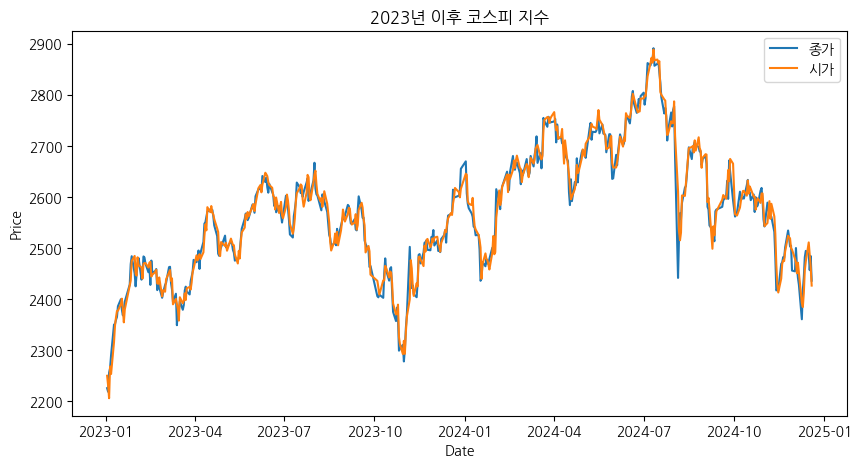

In [52]:
# plt.figure(figsize=(10, 5)) # 10인치 x 6인치
plt.figure(figsize=(10, 5), dpi=100) # Pixels per inch


plt.plot(symbol_kospi['Close'], label='종가')
plt.plot(symbol_kospi['Open'], label='시가')


plt.title('2023년 이후 코스피 지수')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.savefig('kospiPng')
plt.show()

### 지수화(Indexing)

In [53]:
import numpy as np

In [54]:
array_first = np.array([10,20,30])
array_second = np.array([1000,2000,3000])

In [55]:
array_first / array_first[0] * 100

array([100., 200., 300.])

In [56]:
array_second / array_second[0] * 100

array([100., 200., 300.])

In [57]:
symbol_samsung = fdr.DataReader(symbol = '005930', start = '2021', end= '2022')
symbol_tway = fdr.DataReader(symbol = '091810', start = '2021', end='2022')

In [58]:
symbol_samsung.shape, symbol_tway.shape

((248, 6), (248, 6))

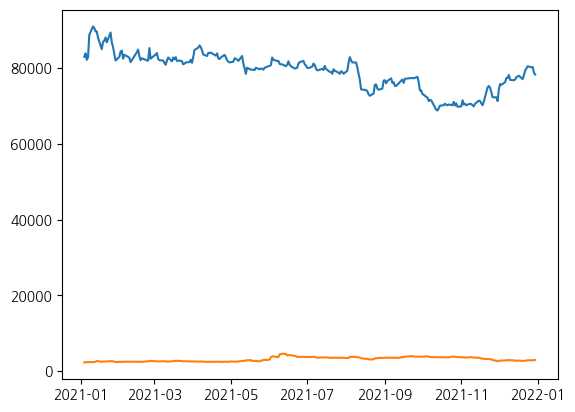

In [59]:
plt.plot(symbol_samsung.index , symbol_samsung['Close'])
plt.plot(symbol_tway.index , symbol_tway['Close'])
plt.show()

In [60]:
# type(symbol_samsung['Close'])
# symbol_samsung['Close']
series_samsung = (symbol_samsung['Close'] / symbol_samsung['Close'].iloc[0]) * 100
series_samsung

Date
2021-01-04    100.000000
2021-01-05    101.084337
2021-01-06     99.036145
2021-01-07     99.879518
2021-01-08    106.987952
                 ...    
2021-12-24     96.987952
2021-12-27     96.626506
2021-12-28     96.746988
2021-12-29     94.939759
2021-12-30     94.337349
Name: Close, Length: 248, dtype: float64

In [61]:
# type(symbol_tway['Close'])
# symbol_tway['Close']
series_tway = (symbol_tway['Close'] / symbol_tway['Close'].iloc[0]) * 100
series_tway

Date
2021-01-04    100.000000
2021-01-05    103.208791
2021-01-06    102.813187
2021-01-07    104.043956
2021-01-08    104.219780
                 ...    
2021-12-24    125.450549
2021-12-27    125.450549
2021-12-28    125.230769
2021-12-29    128.043956
2021-12-30    129.274725
Name: Close, Length: 248, dtype: float64

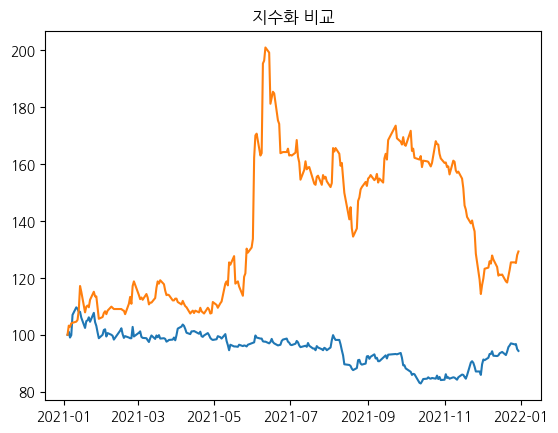

In [63]:
plt.plot(symbol_samsung.index , series_samsung)
plt.plot(symbol_tway.index , series_tway)
plt.title('지수화 비교')
plt.show()